# Extracting Features

# Importing necessary libraries

In [1]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf

%matplotlib inline

# Setting the path

In [2]:
os.getcwd()

'E:\\Intelehealth\\Code'

In [3]:
os.chdir("../India_95")
os.getcwd()

'E:\\Intelehealth\\India_95'

In [4]:
os.listdir()

['.DS_Store',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 'India.xlsx',
 'K-means_Attempt']

# Extracting the truth table

In [5]:
df = pd.read_excel("India.xlsx",sheet_name="With Notes")

In [6]:
df.head(5)

,Number,Hgb,Gender,Age,Note,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,12.2,M,29,Mild Anemia,NaN,Note,Frequency
1,2,8.0,F,36,Anemia,NaN,Anemia,3
2,3,10.7,F,30,Moderate Anemia,NaN,Moderate Anemia,37
3,4,8.3,F,39,Moderate Anemia,NaN,Mild Anemia,28
4,5,7.8,F,29,Anemia,NaN,No Anemia,27


In [7]:
df.drop(df.columns[[5,6,7]], axis=1, inplace=True)

In [8]:
df.head()

,Number,Hgb,Gender,Age,Note
0,1,12.2,M,29,Mild Anemia
1,2,8.0,F,36,Anemia
2,3,10.7,F,30,Moderate Anemia
3,4,8.3,F,39,Moderate Anemia
4,5,7.8,F,29,Anemia


# Basic EDA on truth table

In [9]:
df["Note"].unique()

array(['Mild Anemia', 'Anemia', 'Moderate Anemia', 'No - Anemia'],
      dtype=object)

In [10]:
df.loc[df["Note"]=="Anemia"]

,Number,Hgb,Gender,Age,Note
1,2,8.0,F,36,Anemia
4,5,7.8,F,29,Anemia
25,26,7.6,F,39,Anemia


In [11]:
df.loc[df["Note"]=="No - Anemia"]

,Number,Hgb,Gender,Age,Note
7,8,13.0,M,32,No - Anemia
10,11,13.2,M,38,No - Anemia
20,21,14.8,M,21,No - Anemia
23,24,13.4,F,23,No - Anemia
26,27,12.2,F,48,No - Anemia
38,39,15.2,M,32,No - Anemia
46,47,14.3,M,29,No - Anemia
47,48,13.6,M,39,No - Anemia
51,52,13.4,M,42,No - Anemia
52,53,13.8,M,32,No - Anemia


# Image Extraction and Conversion to RGB

In [12]:
anemic_BGR = cv2.imread("26/20200213_120556_forniceal_palpebral.png")
anemic = cv2.cvtColor(anemic_BGR,cv2.COLOR_BGR2RGB)
non_anemic_BGR = cv2.imread("27/20200213_134128_forniceal_palpebral.png")
non_anemic = cv2.cvtColor(non_anemic_BGR,cv2.COLOR_BGR2RGB)

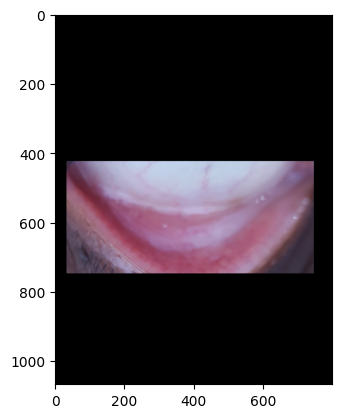

In [13]:
plt.imshow(anemic)

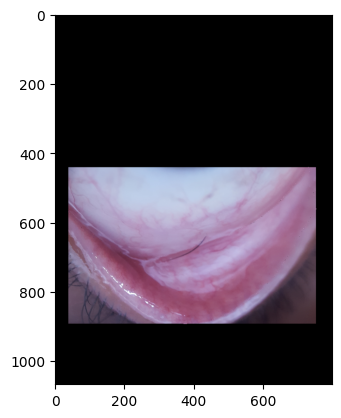

In [14]:
plt.imshow(non_anemic)

# CONVERTING BLACK BACKGROUND TO WHITE

In [15]:
# src = cv2.imread("26/20200213_120556_forniceal_palpebral.png",1)
  
# # Convert image to image gray
# tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  
# # Applying thresholding technique
# _, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
  
# # Using cv2.split() to split channels 
# # of coloured image
# b, g, r = cv2.split(src)
  
# # Making list of Red, Green, Blue
# # Channels and alpha
# rgba = [r, g, b, alpha]
  
# # Using cv2.merge() to merge rgba
# # into a coloured/multi-channeled image
# dst = cv2.merge(rgba, 4)

# plt.imshow(dst)

# Splitting into channels

In [16]:
anemic.shape

(1067, 800, 3)

In [17]:
non_anemic.shape

(1067, 800, 3)

In [18]:
r, g, b = cv2.split(anemic)

In [19]:
r.shape

(1067, 800)

In [20]:
## SPLTING WORKS

# plt.imshow(b)
# rgb = [r,g,b]
# dst = cv2.merge(rgb)
# plt.imshow(dst)

# Extracting 4 features in rgb space

In [21]:
mean_r = r.sum()/r.size
mean_g = g.sum()/g.size
mean_b = b.sum()/b.size
mean_rg = (r - g).sum()/(r-g).size

print("mean_r = ", mean_r)
print("mean_g = ", mean_g)
print("mean_b = ", mean_b)
print("mean_rg = ", mean_rg)

mean_r =  41.40461574507966
mean_g =  32.14363284910965
mean_b =  39.62833645735708
mean_rg =  16.945481490159324


# Extracting features in HSV Space

In [22]:
anemic_hsv = cv2.cvtColor(anemic_BGR,cv2.COLOR_BGR2HSV)

In [23]:
# plt.imshow(anemic_hsv)

In [24]:
h,s,v = cv2.split(anemic_hsv)
h = h/h.max()
nH = np.count_nonzero(h>0.95)
HHR = nH/h.size
print("HHR = ", HHR)

HHR =  0.01806232427366448


# Extracting features in Gray Space

In [25]:
anemic_gray = cv2.cvtColor(anemic_BGR,cv2.COLOR_BGR2GRAY)

In [26]:
B = anemic_gray.sum()/anemic_gray.size
print("B = ", B)

B =  35.76624882849109


# Entropy Calculation

In [27]:
anemic_eq = cv2.equalizeHist(anemic_gray)
# plt.imshow(anemic_eq,cmap='gray')

In [28]:
# plt.hist(anemic_eq)

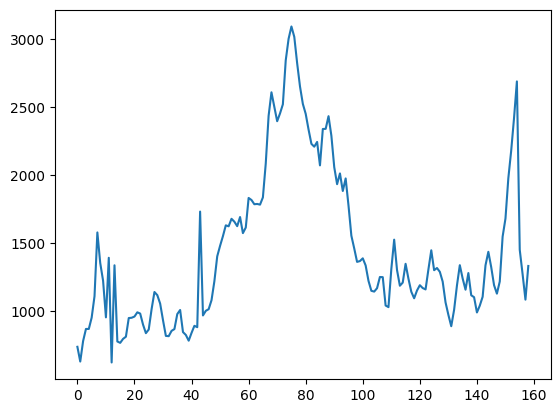

In [29]:
histr_anemic = cv2.calcHist([anemic_eq],[0],None,[256],[0,256])
histr_anemic = histr_anemic[histr_anemic!=0]
plt.plot(histr_anemic[1:])
plt.show()

In [30]:
histr_anemic[:10]

array([623337.,    741.,    633.,    783.,    872.,    872.,    955.,
         1112.,   1580.,   1356.], dtype=float32)

In [31]:
unique, counts = np.unique(anemic_eq, return_counts=True)
total_counts = counts.sum()
# counts = counts/total_counts

In [32]:
# plt.plot(counts[1:])
# counts

In [33]:
dict(zip(unique, counts))

{0: 623337,
 1: 741,
 2: 633,
 3: 783,
 4: 872,
 5: 872,
 6: 955,
 7: 1112,
 9: 1580,
 10: 1356,
 12: 1226,
 13: 957,
 14: 1394,
 15: 626,
 16: 1339,
 17: 780,
 18: 770,
 19: 799,
 20: 815,
 21: 952,
 22: 954,
 23: 963,
 24: 994,
 25: 985,
 26: 904,
 27: 841,
 28: 868,
 29: 1017,
 31: 1143,
 32: 1120,
 33: 1058,
 34: 936,
 35: 821,
 36: 819,
 37: 858,
 38: 871,
 39: 981,
 40: 1011,
 41: 849,
 42: 828,
 43: 786,
 44: 843,
 45: 895,
 46: 885,
 47: 1733,
 49: 971,
 50: 1005,
 51: 1017,
 52: 1083,
 53: 1222,
 55: 1405,
 57: 1482,
 58: 1553,
 60: 1632,
 62: 1625,
 64: 1680,
 66: 1659,
 67: 1626,
 69: 1693,
 71: 1575,
 73: 1616,
 75: 1833,
 77: 1818,
 79: 1787,
 81: 1789,
 83: 1784,
 85: 1837,
 87: 2085,
 90: 2435,
 93: 2608,
 95: 2500,
 98: 2396,
 101: 2453,
 104: 2520,
 107: 2842,
 110: 3000,
 113: 3091,
 117: 3015,
 120: 2822,
 123: 2651,
 126: 2523,
 128: 2450,
 131: 2335,
 133: 2230,
 136: 2209,
 138: 2244,
 141: 2072,
 143: 2339,
 146: 2340,
 148: 2433,
 151: 2289,
 153: 2059,
 155: 19

In [34]:
# prob = dict(zip(unique, counts/counts.sum()))
# prob

In [121]:
# total_counts = counts.sum()
# Ent = np.sum(np.array([-i*(i/total_counts)*math.log((i/total_counts),2) for i in counts]))

# INCLUDING 0 (DARK PIXELS)
# print("Ent = ", Ent) #210458.9326424669


total_counts = counts[21:240].sum()
Ent = np.sum(np.array([-i*(i/total_counts)*math.log((i/total_counts),2) for i in counts[21:240]]))


# INCLUDING 0 (DARK PIXELS)
print("Ent = ", Ent)

Ent =  11817.63826917821


# Extracting the "g" features

## Padding the image

In [36]:
def pad_image(image,padding):
    # image = anemic_gray
    # padding = 1
    #  creating an array of zeros
    padded = arr = np.zeros((image.shape[0] + padding*2, 
                       image.shape[1] + padding*2))
    
    #  inserting image into zero array
    padded[int(padding):-int(padding), int(padding):-int(padding)] = image
    
    
    print(f'original image size: {image.shape}')
    print(f'padded image size: {padded.shape}')
    return padded

In [37]:
padded_anemic = pad_image(anemic_gray,1)

original image size: (1067, 800)
padded image size: (1069, 802)


## Pooling attempt

In [38]:
# # POOLING

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import MaxPooling2D
 
# # define input image
# image = np.array([[2, 2, 7, 3],
#                   [9, 4, 6, 1],
#                   [8, 5, 2, 4],
#                   [3, 1, 2, 6]])
# image = image.reshape(1, 4, 4, 1)
 
# # define model containing just a single max pooling layer
# model = Sequential(
#     [MaxPooling2D(pool_size = 2, strides = 2)])
 
# # generate pooled output
# output = model.predict(image)
 
# # print output image
# output = np.squeeze(output)
# print(output)

## Working on features

In [39]:
Ixy = anemic_gray
Ixy.shape

(1067, 800)

### g2 (max pooling)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

image = padded_anemic.reshape(1, 1069, 802, 1)

model = Sequential(
    [MaxPooling2D(pool_size = 3, strides = 1)])
max_pooling = model.predict(image)
max_Ixy = np.squeeze(max_pooling)

1/1 [==============================] - 1s 686ms/step


In [41]:
g2 = max_Ixy - Ixy
print(g2.shape)
print("Found g2")

(1067, 800)
Found g2


#### Trying different max pooling

In [42]:
# from skimage.measure import block_reduce

In [43]:
# img = Ixy
# mean_pool=block_reduce(img, block_size=(3,3), func=np.mean)
# # max_pool=block_reduce(img, block_size=3, func=np.max)
# # max_pool=block_reduce(img, block_size=1, func=np.max, cval=1)
# # max_pool=block_reduce(img, block_size=1, func=np.max)
# max_pool=block_reduce(img, block_size=(1,1), func=np.max)
# min_pool=block_reduce(img, block_size=(3,3), func=np.min)

In [44]:
# # g2_other = max_pool - Ixy
# # g2_other.shape
# max_pool.shape

In [45]:
# img.shape

In [46]:
# g2_other = max_pool - Ixy
# print(g2_other.shape)

In [47]:
# np.array_equal(Ixy,max_pool)

In [48]:
import imgaug.augmenters as iaa


# from imgaug import augmenters as iaa

# seq = iaa.Sequential([
#     		iaa.Crop(px=(0, 16)),
#     		iaa.Fliplr(0.5),
#     		iaa.GaussianBlur(sigma=(0, 3.0))])

# for batch_idx in range(1000):
#     		images = load_batch(batch_idx)
#     		images_aug = seq(images=images)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [49]:
# aug_max = iaa.MaxPooling(3)
# aug_max = iaa.Sequential([
#     iaa.MaxPooling(3)])

In [50]:
# max_pool_iaa = aug_max(images=anemic_gray)

### g3 (average pooling)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D

image = padded_anemic.reshape(1, 1069, 802, 1)

model = Sequential(
    [MaxPooling2D(pool_size = 3, strides = 1)])
avg_pooling = model.predict(image)
avg_Ixy = np.squeeze(max_pooling)

1/1 [==============================] - 0s 322ms/step


In [52]:
g3 = Ixy - avg_Ixy
print(g3.shape)
print("Found g3")

(1067, 800)
Found g3


### Code for pooling

In [53]:
def pooling(image, pool_size, code, padding):
    #different codes for different pooling
    #code min :min pooling
    #code max :max pooling 
    #code mean :mean pooling 
    #code std :standard deviation pooling
    #returns a image with padding operation and pooling operation

    padded = arr = np.zeros((image.shape[0] + padding*2, 
                       image.shape[1] + padding*2))
    
    #  inserting image into zero array
    padded[int(padding):-int(padding), int(padding):-int(padding)] = image
    
    
    print(f'original image size: {image.shape}')
    print(f'padded image size: {padded.shape}')

    input_height, input_width = padded.shape
    pool_height, pool_width = pool_size

    # Calculate the output dimensions
    output_height = input_height - pool_height + 1
    output_width = input_width - pool_width + 1

    # Initialize the output data
    output_data = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest (ROI)
            roi = padded[i : i + pool_height, j : j + pool_width]
            
            if code=='min':
                # Apply min pooling within the ROI
                output_data[i, j] = np.min(roi)

            if code=='max':
                # Apply max pooling within the ROI
                output_data[i, j] = np.max(roi)

            if code=='mean':
                # Apply mean pooling within the ROI
                output_data[i, j] = np.mean(roi)

            if code=='std':
                # Apply min pooling within the ROI
                output_data[i, j] = np.std(roi)


    print(f'{code} pooled image size: {output_data.shape}')
    return output_data

#### Checking for accuracy of result

In [54]:
Ixy = anemic_gray
Ixy.shape

(1067, 800)

In [55]:
max_Ixy_self = pooling(image=Ixy, pool_size=(3,3), code='max', padding=1)

original image size: (1067, 800)
padded image size: (1069, 802)
max pooled image size: (1067, 800)


In [56]:
g2_self = max_Ixy_self - Ixy

print("Are the results of using max pooling using tensorflow and self-made function same ", np.array_equal(g2,g2_self))

Are the results of using max pooling using tensorflow and self-made function same  True


## Calculating the "g" features

In [57]:
min_Ixy_self = pooling(image=Ixy, pool_size=(3,3), code='min', padding=1)
max_Ixy_self = pooling(image=Ixy, pool_size=(3,3), code='max', padding=1)
mean_Ixy_self = pooling(image=Ixy, pool_size=(3,3), code='mean', padding=1)
std_Ixy_self = pooling(image=Ixy, pool_size=(3,3), code='std', padding=1)

original image size: (1067, 800)
padded image size: (1069, 802)
min pooled image size: (1067, 800)
original image size: (1067, 800)
padded image size: (1069, 802)
max pooled image size: (1067, 800)
original image size: (1067, 800)
padded image size: (1069, 802)
mean pooled image size: (1067, 800)
original image size: (1067, 800)
padded image size: (1069, 802)
std pooled image size: (1067, 800)


### g1

In [58]:
g1_self = Ixy - min_Ixy_self

### g2

In [59]:
g2_self = max_Ixy_self - Ixy

### g3

In [60]:
g3_self = Ixy - mean_Ixy_self

### g4

In [61]:
g4_self = std_Ixy_self

### g5

In [62]:
g5_self = Ixy

## Calculating "G" features

In [63]:
G1 = g1_self.sum()/g1_self.size
G2 = g2_self.sum()/g2_self.size
G3 = g3_self.sum()/g3_self.size
G4 = g4_self.sum()/g4_self.size
G5 = g5_self.sum()/g5_self.size

print("FOUND G1, G2, G3, G4, G5")

FOUND G1, G2, G3, G4, G5


In [147]:
G1

0.8642596063730085

In [148]:
G3

2.1309622815673107e-18

# Practice

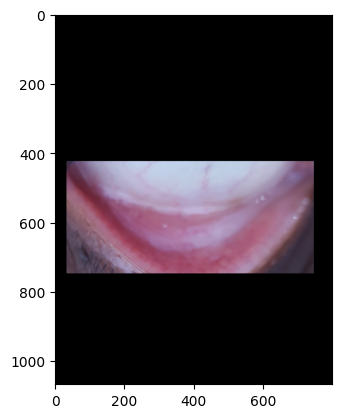

In [64]:
plt.imshow(anemic)

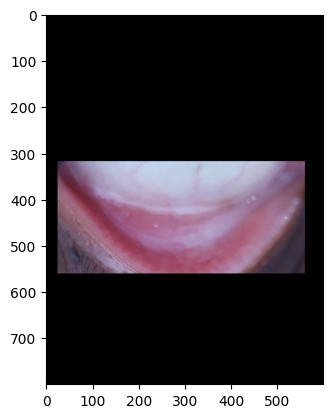

In [66]:
anemic_resize1 = cv2.resize(anemic, None, fx = 0.75, fy = 0.75)
plt.imshow(anemic_resize1)

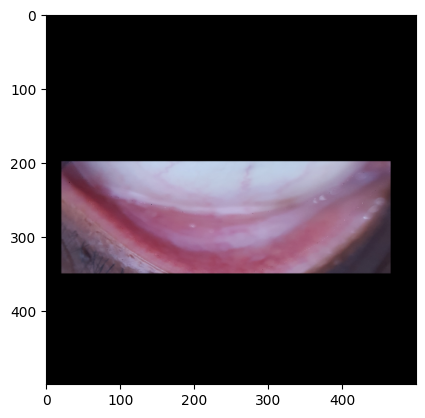

In [67]:
anemic_resize2 = cv2.resize(anemic, (500,500))
plt.imshow(anemic_resize2)

In [71]:
img2 = cv2.imread('46/20200216_231923_forniceal_palpebral.png')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

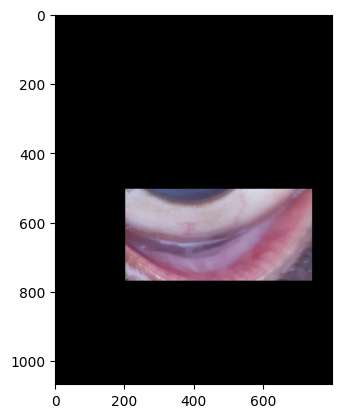

In [72]:
plt.imshow(img2_rgb)

In [91]:
img2.shape

(1067, 800, 3)

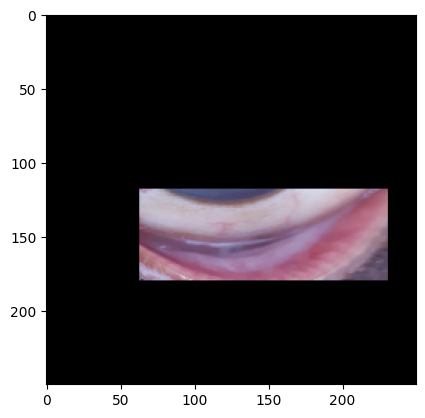

In [95]:
img_resize = cv2.resize(img2_rgb, (250,250))
plt.imshow(img_resize)

In [92]:
# img_resize2 = cv2.resize(img2_rgb, (500,374))
# plt.imshow(img_resize2)

In [89]:
# factor = int((img2.shape[1]/img2.shape[0])*500)
# factor

In [143]:
# arr = anemic
# sum=count=0
# one_d=two_d=three_d=[]
# for i in arr:
#     for j in i:
#         for k in j:
            
#             if(k>20 and k<240): #only pixels whose value is not between 20 and 240
#                 # print(k)
#                 pass
#             else:
#                 k = 1000000

In [144]:
# print(arr[3][800])

In [145]:
# # np.count_nonzero(arr)
# unique, counts = np.unique(arr, return_counts=True)
# dict(zip(unique, counts))

In [146]:
# arr[3][3][2]